Kullanılacak olan giriş/çıkıştaki formül 2x/4 +10 'dur. Modelin ağırlıkları 0.5 ve 10 olarak bulması gerekmektedir. (Sayıyı 0.5 ile çarp ve 10 ekle)

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
input = np.array([2,6,10,25,50,77,83,100], dtype = float)
output = np.array([11,13,15,35,22.5,48.5,51.5,60], dtype = float)

In [3]:
model = tf.keras.Sequential(tf.keras.layers.Dense(units = 1, input_shape = [1]))

Input shape katmana girişin tek bir değer olduğunu belirtir, burada giriş tek üyeye sahip tek boyutlu bir dizidir.

Units katmandaki nöron sayısını belirtir, bu aynı zamanda çıktı katmanıdır ayrıca çok katmanlı bir ağda katmanın boyutunun ve şeklinin bir sonraki katmanın şekli ile aynı olması gerekir.

Sequantial model her katmanın tam olarak bir giriş tensörüne ve bir çıkış tensörüne sahip olduğu düz bir katman yığını için uygundur.

In [4]:
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(0.1))

Model oluşturulduktan sonra derlenmesi gerekmektedir, derlenme yapılırken loss ve optimizer girilmelidir.

**Loss Function:** Çıkışta elde edilecek tahminlerin gerçek sonuçtan ne kadar uzak olduğunu ölçmenin yolu.

**Optimizer Function:** Kaybı azaltmak için iç değerleri ayarlamanın bir yolu. İçerisinde bulunan 0.1 ise learning rate yani öğrenme hızıdır. Parametreler güncellenirken öğrenme hızı kullanılmaktadır.

In [5]:
fitter = model.fit(input,
                   output,
                   epochs = 500,
                   verbose = False)

Model eğitilirken girilen parametrelerden **epochs** eğitimin kaç defa tekrarlanacağını belirtirken **verbose** parametresi ise eğitim yapılırken verilen ayrıntıları (hangi adımda olunduğu vs.) gizlememize yarar.

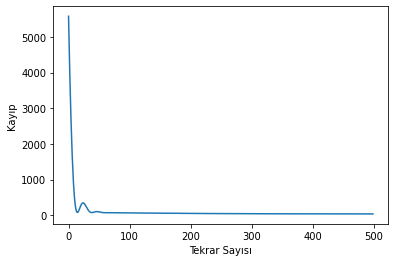

In [6]:
import matplotlib.pyplot as plt
plt.xlabel('Tekrar Sayısı')
plt.ylabel('Kayıp')
plt.plot(fitter.history['loss']);

In [7]:
#gerçek değerler için fonksiyon
def form(x):
  y = ((x*2)/4) +10
  return y

In [8]:
print('55 için tahmin: ',model.predict([55]))
print('110 için tahmin: ',model.predict([110]))
print('500 için tahmin: ',model.predict([500]))
print('1113 için tahmin: ', model.predict([1113]))
print('10k3 için tahmin: ',model.predict([10003]))

55 için tahmin:  [[36.89776]]
110 için tahmin:  [[63.599464]]
500 için tahmin:  [[252.93886]]
1113 için tahmin:  [[550.5415]]
10k3 için tahmin:  [[4866.509]]


In [9]:
pred = [55,110,500,1113,10003]
for i in pred:
  print(form(i))

37.5
65.0
260.0
566.5
5011.5


In [10]:
#Modelin ağırlıkları
model.get_weights()

[array([[0.4854856]], dtype=float32), array([10.196051], dtype=float32)]